<a href="https://colab.research.google.com/github/huynhspm/Basic_ML/blob/main/Image%20Classification/Cifar10_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification Project**

In [ ]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.datasets import cifar10, cifar100
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import time

In [ ]:
# 2. Load dữ liệu cifar
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_val, y_val = X_train[40000:50000,:], y_train[40000:50000]
X_train, y_train = X_train[:40000,:], y_train[:40000]

label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

170508288/170498071 [==============================] - 13s 0us/step
(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3)
(40000, 1) (10000, 1) (10000, 1)


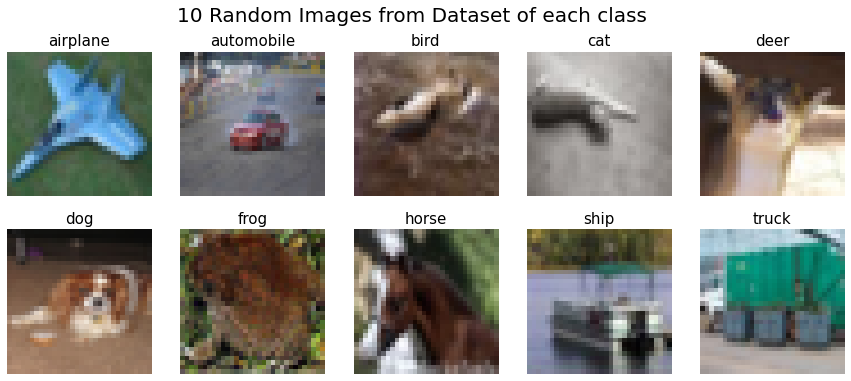

In [ ]:
# 3. show image
def get_ten_random_images():
  d = {}
  while len(d.keys()) < 10:
      idx = random.randint(0, len(y_train)-1)
      if y_train[idx][0] not in d.keys():
          d[y_train[idx][0]] = idx
  return d

d = get_ten_random_images()
rows = 2
cols = 5
fig, axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(1, rows*cols+1):
    axes[i-1].imshow(X_train[d[i-1]])
    axes[i-1].axis('off')
    axes[i-1].set_title(label[i-1], fontsize=15)
fig.suptitle('10 Random Images from Dataset of each class', fontsize = 20)
plt.show()

In [ ]:
# 4. prepare data
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
 
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

In [ ]:
# 5. build model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
# 6. train model
start_time = time.time()
H = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=20, verbose=1)
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

Epoch 1/20
1250/1250 [==============================] - 22s 8ms/step - loss: 1.8531 - accuracy: 0.4367 - val_loss: 1.3187 - val_accuracy: 0.5731
Epoch 2/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1316 - accuracy: 0.6161 - val_loss: 0.9931 - val_accuracy: 0.6532
Epoch 3/20
1250/1250 [==============================] - 11s 8ms/step - loss: 0.9060 - accuracy: 0.6880 - val_loss: 1.0376 - val_accuracy: 0.6373
Epoch 4/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7852 - accuracy: 0.7267 - val_loss: 0.6902 - val_accuracy: 0.7605
Epoch 5/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.7021 - accuracy: 0.7573 - val_loss: 0.6571 - val_accuracy: 0.7725
Epoch 6/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6405 - accuracy: 0.7757 - val_loss: 0.6649 - val_accuracy: 0.7737
Epoch 7/20
1250/1250 [==============================] - 12s 10ms/step - loss: 0.5948 - accuracy: 0.7913 - val_loss: 0.6044 - val_accu

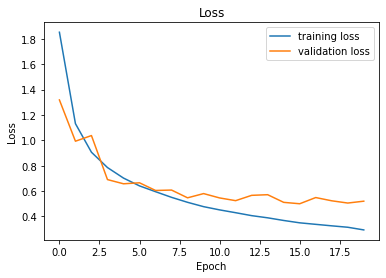

In [ ]:
# 7. Vẽ đồ thị loss của traning set và validation set
numOfEpoch = 20
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

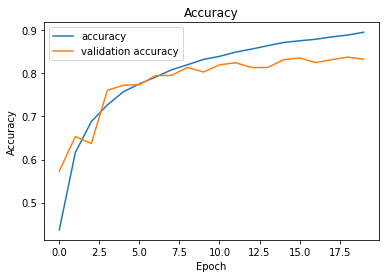

In [ ]:
# 8. Vẽ đồ thị accuracy của traning set và validation set
numOfEpoch = 20
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# 9.Đánh giá model với testset
start_time = time.time()
print('neural network: ', model.evaluate(X_test, y_test, verbose = 1))
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

313/313 [==============================] - 1s 4ms/step - loss: 0.5262 - accuracy: 0.8364
neural network:  [0.5261678099632263, 0.8363999724388123]
Running time: 1.39 (s)


[[9.2740805e-07 3.5657769e-04 1.4240130e-10 5.5560162e-10 3.0590211e-10
  9.7228363e-12 3.0667735e-10 6.3698068e-11 9.9964225e-01 2.4440439e-07]]
[8] 8
Giá trị dự đoán:  ship


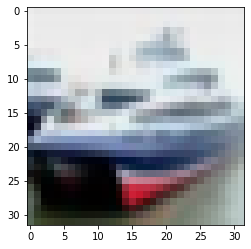

In [ ]:
# 10.predict
id =1
plt.imshow(X_test[id])

y_predict = model.predict(X_test[id].reshape(1, 32, 32, 3))
print(y_predict)
y_predict = np.argmax(y_predict)
print(y_test[id], y_predict)
print('Giá trị dự đoán: ', label[y_predict])